In [1]:
import warnings
import argparse
import torch
import numpy as np
from PIL import Image
from torchvision.models.detection.image_list import ImageList
import sys
sys.path.append("../") # go to parent dir
from realtime_panoptic.models.rt_pano_net_optimized import RTPanoNetOpt
from realtime_panoptic.config import cfg
import realtime_panoptic.data.panoptic_transform as P
from realtime_panoptic.utils.visualization import visualize_segmentation_image,visualize_detection_image

In [2]:

import os
os.getcwd()

'/detectron2_local/projects/realtime_panoptic/notebooks'

In [3]:
cityscapes_colormap = np.array([
 [128,  64, 128],
 [244,  35, 232],
 [ 70,  70,  70],
 [102, 102, 156],
 [190, 153, 153],
 [153, 153, 153],
 [250 ,170,  30],
 [220, 220,   0],
 [107, 142,  35],
 [152, 251, 152],
 [ 70, 130, 180],
 [220,  20,  60],
 [255,   0,   0],
 [  0,   0, 142],
 [  0,   0,  70],
 [  0,  60, 100],
 [  0,  80, 100],
 [  0,   0, 230],
 [119,  11,  32],
 [  0,   0,   0]])

cityscapes_instance_label_name = ['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
cfg.merge_from_file("/detectron2_local/projects/realtime_panoptic/configs/demo_config.yaml")

In [5]:
cfg

CfgNode({'model': CfgNode({'name': 'Cityscape_realtime_panoptic', 'backbone': 'R-50-FPN-RETINANET', 'checkpoint_path': '', 'panoptic': CfgNode({'num_classes': 19, 'num_thing_classes': 8, 'pre_nms_thresh': 0.06, 'pre_nms_top_n': 1000, 'nms_thresh': 0.6, 'fpn_post_nms_top_n': 100, 'instance_id_range': (11, 18)})}), 'input': CfgNode({'pixel_mean': [102.9801, 115.9465, 122.7717], 'pixel_std': [1.0, 1.0, 1.0], 'to_bgr255': True})})

In [6]:
model = RTPanoNetOpt(
    backbone=cfg.model.backbone, 
    num_classes=cfg.model.panoptic.num_classes,
    things_num_classes=cfg.model.panoptic.num_thing_classes,
    pre_nms_thresh=cfg.model.panoptic.pre_nms_thresh,
    pre_nms_top_n=cfg.model.panoptic.pre_nms_top_n,
    nms_thresh=cfg.model.panoptic.nms_thresh,
    fpn_post_nms_top_n=cfg.model.panoptic.fpn_post_nms_top_n,
    instance_id_range=cfg.model.panoptic.instance_id_range)

In [7]:
device = "cuda"
model.to(device)
model.load_state_dict(torch.load("/detectron2_local/projects/realtime_panoptic/cvpr_realtime_pano_cityscapes_standalone_no_prefix.pth"))

<All keys matched successfully>

In [8]:
print(model)

RTPanoNetOpt(
  (backbone): ResNetWithModifiedFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256)
          )
        )
        (1): B

In [9]:
#     # Prepare for model inference.
#     model.eval()
#     input_image = Image.open('/home/appuser/detectron2_repo/projects/realtime_panoptic/media/figs/test.png')
#     data = {'image': input_image}
#     # data pre-processing
#     normalize_transform = P.Normalize(mean=cfg.input.pixel_mean, std=cfg.input.pixel_std, to_bgr255=cfg.input.to_bgr255)
#     transform = P.Compose([
#         P.ToTensor(),
#         normalize_transform,
#     ])
#     data = transform(data)
#     print("Done with data preparation and model configuration.")
#     with torch.no_grad():
#         input_image_list = ImageList([data['image'].to(device)], image_sizes=[input_image.size[::-1]])
#         print(data['image'].shape)
#         panoptic_result, _ = model.forward(input_image_list)
#         print("Done with model inference.")
#         print("Process and visualizing the outputs...")
#         instance_detection = [o.to('cpu') for o in panoptic_result["instance_segmentation_result"]]
#         semseg_logics = [o.to('cpu') for o in panoptic_result["semantic_segmentation_result"]]
#         semseg_prob = [torch.argmax(semantic_logit , dim=0) for semantic_logit in  semseg_logics]

#         seg_vis = visualize_segmentation_image(semseg_prob[0], input_image, cityscapes_colormap)
#         Image.fromarray(seg_vis.astype('uint8')).save('semantic_segmentation_result.jpg')
#         print("Saved semantic segmentation visualization in semantic_segmentation_result.jpg")
#         det_vis = visualize_detection_image(instance_detection[0], input_image, cityscapes_instance_label_name)
#         Image.fromarray(det_vis.astype('uint8')).save('instance_segmentation_result.jpg')
#         print("Saved instance segmentation visualization in instance_segmentation_result.jpg")
#         print("Demo finished.")

In [10]:
!nvidia-smi

Thu Jan 14 00:00:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 455.45.01    CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:03:00.0  On |                  N/A |
| 29%   39C    P8    25W / 250W |   2003MiB / 11018MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:04:00.0 Off |                  N/A |
| 27%   

In [11]:
import realtime_panoptic.data.panoptic_transform as P
from PIL import Image
from matplotlib import pyplot as plt


In [12]:
input_image = Image.open("/detectron2_local/projects/realtime_panoptic/media/figs/test.png")
data = {'image': input_image}
# data pre-processing
normalize_transform = P.Normalize(mean=cfg.input.pixel_mean, std=cfg.input.pixel_std, to_bgr255=cfg.input.to_bgr255)
transform = P.Compose([
    P.ToTensor(),
    normalize_transform,
])
data = transform(data)

In [13]:
data['image'].unsqueeze(0).shape

torch.Size([1, 3, 1024, 2048])

torch.Size([66, 1024, 2048])
torch.Size([1, 19, 1024, 2048])
(1024, 2048, 3)


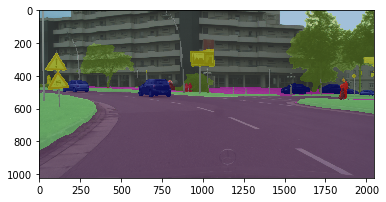

In [15]:
with torch.no_grad():
#     input_image_list = ImageList([data['image'].to(device)], image_sizes=[input_image.size[::-1]])
    instance_masks,semantic_logits_raw = model.forward(data['image'].unsqueeze(0).to('cuda'))
    print(instance_masks[0].shape)
    print(semantic_logits_raw.shape)
    semseg_logics = [o.to('cpu') for o in semantic_logits_raw]
    semseg_prob = [torch.argmax(semantic_logit , dim=0) for semantic_logit in  semseg_logics]
    seg_vis = visualize_segmentation_image(semseg_prob[0], input_image, cityscapes_colormap)
    print(seg_vis.shape)
    plt.imshow(seg_vis, interpolation='nearest')
    plt.show()


torch.Size([0, 1024, 2048])
torch.Size([1, 19, 1024, 2048])
(1024, 2048, 3)


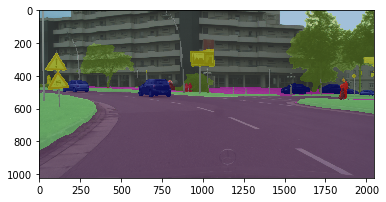

In [17]:
input_data = torch.randn((1, 3, 1024, 2048))
# input_shape=(1, 3, 800, 800)
# input_data_p = {"image": input_data}
# input_data_batched = input_shape[0]*[input_data_p]
traced_model = torch.jit.trace(model.eval(), [input_data.to("cuda")], check_trace =False)
with torch.no_grad():
#     input_image_list = ImageList([data['image'].to(device)], image_sizes=[input_image.size[::-1]])
    instance_masks,semantic_logits_raw = traced_model.forward(data['image'].unsqueeze(0).to('cuda'))
    print(instance_masks[0].shape)
    print(semantic_logits_raw.shape)
    semseg_logics = [o.to('cpu') for o in semantic_logits_raw]
    semseg_prob = [torch.argmax(semantic_logit , dim=0) for semantic_logit in  semseg_logics]
    seg_vis = visualize_segmentation_image(semseg_prob[0], input_image, cityscapes_colormap)
    print(seg_vis.shape)
    plt.imshow(seg_vis, interpolation='nearest')
    plt.show()

In [18]:

import time
import numpy as np

import torch.backends.cudnn as cudnn
cudnn.benchmark = True

def benchmark(model, input_shape=(1024, 1, 224, 224), dtype='fp32', nwarmup=50, nruns=10000, device="cuda"):
    input_data = torch.randn(input_shape)
    input_data = input_data.to(device)
    if dtype=='fp16':
        input_data = input_data.half()
        
    print("Warm up ...")
    with torch.no_grad():
        for _ in range(nwarmup):
            features = model.forward(input_data)
    torch.cuda.synchronize()
    print("Start timing ...")
    timings = []
    with torch.no_grad():
        for i in range(1, nruns+1):
            start_time = time.time()
            features = model.forward(input_data)
            torch.cuda.synchronize()
            end_time = time.time()
            timings.append(end_time - start_time)
            if i%100==0:
                print('Iteration %d/%d, ave batch time %.2f ms'%(i, nruns, np.mean(timings)*1000))

#     print("Input shape:", input_data.size())
#     print("Output features size:", features.size())
    print('Average batch time: %.2f ms'%(np.mean(timings)*1000))

In [ ]:
input_data_tmp = torch.randn((3, 1024, 2048))
input_data_tmp.shape[-2]

In [ ]:
model.eval()
benchmark(model, input_shape=(1, 3, 1024, 2048), nruns=300, device="cuda")

In [ ]:
input_data = torch.randn((1, 3, 1024, 2048))
# input_shape=(1, 3, 800, 800)
# input_data_p = {"image": input_data}
# input_data_batched = input_shape[0]*[input_data_p]
input_data = input_data.half()
model = model.half()
traced_model = torch.jit.trace(model.eval(), [input_data.to("cuda")], check_trace =False)



In [ ]:
benchmark(traced_model, input_shape=(3, 3, 512, 1024), nruns=300, dtype='fp16', device="cuda")

In [19]:

import trtorch

# The compiled module will have precision as specified by "op_precision".
# Here, it will have FP16 precision.
trt_model = trtorch.compile(traced_model, {
    "input_shapes": [(1, 3, 1024, 2048)],
    "op_precision": torch.float32, # Run with FP16
    "workspace_size": 1 << 20
})
#     # The compiled module will have precision as specified by \"op_precision\".\n",
#     # Here, it will have FP16 precision.\n",
#     trt_model_fp32 = trtorch.compile(traced_model, {
#         \"input_shapes\": [(1, 3, 1024, 2048)],\n",
#         \"op_precision\": torch.float32, # Run with FP32\n",
#         \"workspace_size\": 1 << 20\n",
#     })"

RuntimeError: Trying to create tensor with negative dimension -1: [-1, 128, 128, 256]